## ISO 18431-4

Shock Response Spectra 계산 Coefficient

$y_n = b_0 \cdot x_n + b_1 \cdot x_{n-1} + b_2 \cdot x_{n-2} - a_1 \cdot y_{n-1} - a_2 \cdot y_{n-2}$

$b_0 = 1- exp(-A)\cdot sin(B)/B$

$b_1 = 2exp(-A)\cdot {sin(B)/B - cos(B)}$

$b_2 = exp(-2A)-exp(-A)\cdot sin(B)/B$

$a_1 = -2exp(-A)\cdot cos(B)$

$a_2 = exp(-2A)$

$A = \frac{\omega_n \cdot T}{2Q}$

$B = \omega_n \cdot T \cdot \sqrt{1-\frac{1}{4Q^2}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

In [19]:
# th_in : acceleration time history at base
# th_out : acceleration time history at mass
def SDOF_ISO(th_in,dt,fn,zeta):

    wn = 2*np.pi*fn;
    wd = wn*np.sqrt(1-zeta**2);
    A=wn*dt*zeta;
    B=wd*dt;
    
    a, b = np.zeros(3), np.zeros(3);

    b[0] = 1 - np.exp(-A)*np.sin(B)/B;
    b[1] = 2*np.exp(-A)*(np.sin(B)/B - np.cos(B));
    b[2] = np.exp(-2*A) - np.exp(-A) * np.sin(B)/B;

    a[0] = 1;
    a[1] = -2*np.exp(-A)*np.cos(B);
    a[2] = np.exp(-2*A);

    th_out=lfilter(b, a, th_in, axis=-1, zi=None);
    
    return th_out;

In [24]:
# th_in : acceleration time history at base
# th_out : acceleration time history at mass
def SDOF_smallwood(th_in,dt,fn,zeta):
    
    wn = 2*np.pi*fn;
    wd = wn*np.sqrt(1-zeta**2);
    E = np.exp(-zeta*wn*dt);
    K = dt*wd;
    C = E*np.cos(K);
    S = E*np.sin(K);
    Sp = S/K;
    
    a, b = np.zeros(3), np.zeros(3);

    b[0] = 1 - Sp;
    b[1] = 2*(Sp-C);
    b[2] = E**2 - Sp;

    a[0] = 1;
    a[1] = -2*C;
    a[2] = E**2;

    th_out=lfilter(b, a, th_in, axis=-1, zi=None);
    
    return th_out;        

In [25]:
## Sample Time History
lftab = np.linspace(0,1000,1001)/10;  dt = 1/(20*max(lftab));  damp = 0.01;
t = np.arange(10001)*dt;
gth = 10*np.sin(2*np.pi*t) + 13*np.sin(2*np.pi*3*t+np.pi/1.3) + 17*np.sin(2*np.pi*5*t+np.pi/1.7);

In [26]:
th_ISO = SDOF_ISO(gth,dt,10,0.02);
th_smw = SDOF_smallwood(gth,dt,10,0.02);

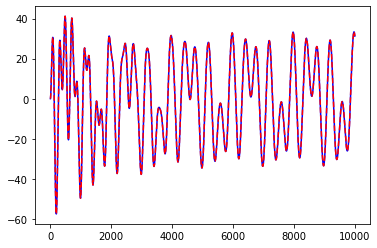

In [28]:
plt.plot(th_ISO,'b-'); plt.plot(th_smw,'r--');

## 결론 : Smallwood 논문과 ISO 18431-4의 응답스펙트럼계상방법 동일